In [16]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [18]:
# Step 2: Load dataset correctly (for space-separated values stored as strings)
raw_df = pd.read_csv("housing (1).csv", header=None)


In [20]:
# Check if it's a single-column issue
if raw_df.shape[1] == 1:
    # Convert space-separated string rows into numerical columns
    df = raw_df[0].str.strip().str.split(r"\s+", expand=True)
    df = df.apply(pd.to_numeric)
else:
    df = raw_df.copy()  # If already structured correctly

print("Parsed Data Shape:", df.shape)
print("Preview:")
print(df.head())

Parsed Data Shape: (506, 14)
Preview:
        0     1     2   3      4      5     6       7   8      9     10  \
0  0.00632  18.0  2.31   0  0.538  6.575  65.2  4.0900   1  296.0  15.3   
1  0.02731   0.0  7.07   0  0.469  6.421  78.9  4.9671   2  242.0  17.8   
2  0.02729   0.0  7.07   0  0.469  7.185  61.1  4.9671   2  242.0  17.8   
3  0.03237   0.0  2.18   0  0.458  6.998  45.8  6.0622   3  222.0  18.7   
4  0.06905   0.0  2.18   0  0.458  7.147  54.2  6.0622   3  222.0  18.7   

       11    12    13  
0  396.90  4.98  24.0  
1  396.90  9.14  21.6  
2  392.83  4.03  34.7  
3  394.63  2.94  33.4  
4  396.90  5.33  36.2  


In [22]:
# Step 3: Add column names (Boston Housing has 13 features + 1 target = 14 columns)
column_names = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE",
    "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"
]
df.columns = column_names

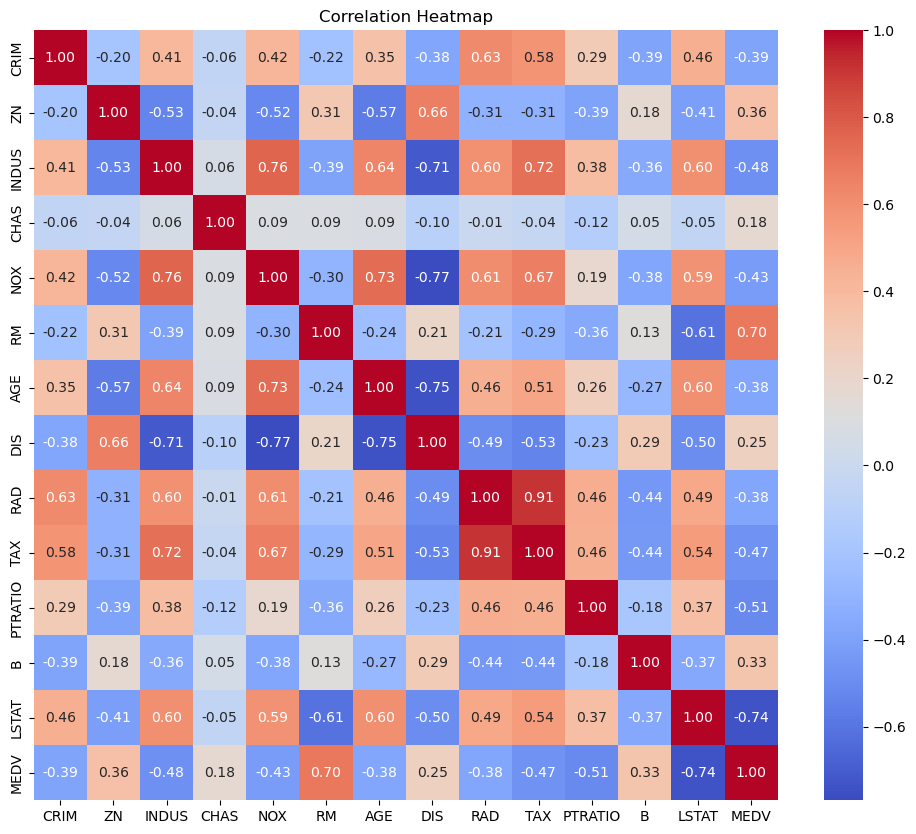

In [24]:
# Step 4: Visualize correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [26]:
# Step 5: Prepare features and target
X = df.drop("MEDV", axis=1).values
y = df["MEDV"].values


In [28]:
# Step 6: Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [30]:
# Step 7: Normalize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [32]:
# Step 8: Build DNN model for regression
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)  # Output layer
    ])
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01),
                  loss='mse', metrics=['mae'])
    return model

In [34]:
# Step 9: Train the model
model = build_model()
history = model.fit(X_train, y_train, epochs=100, batch_size=8,
                    validation_split=0.2, verbose=1)


Epoch 1/100


/home/mca/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-05-02 11:35:07.051243: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 319.9324 - mae: 13.9673 - val_loss: 27.3439 - val_mae: 3.6190
Epoch 2/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 17.3947 - mae: 3.1808 - val_loss: 19.6372 - val_mae: 3.1946
Epoch 3/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 17.7205 - mae: 3.0650 - val_loss: 19.9870 - val_mae: 2.9667
Epoch 4/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13.3470 - mae: 2.8039 - val_loss: 19.0064 - val_mae: 2.9996
Epoch 5/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 15.5051 - mae: 2.9246 - val_loss: 13.4843 - val_mae: 2.6040
Epoch 6/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13.1173 - mae: 2.6480 - val_loss: 12.9658 - val_mae: 2.5890
Epoch 7/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 11.7404 - mae: 2.4988 - val_loss: 14.6038 - val_mae: 2.9261
Epoch 8/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.3069 - mae: 2.3025 - val_loss: 18.8185 - val_mae: 3.2698
Epoch 9/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 

In [36]:
# Step 10: Evaluate the model
test_mse, test_mae = model.evaluate(X_test, y_test, verbose=0)
print(f"\nTest MAE: {test_mae:.2f}")



Test MAE: 2.13


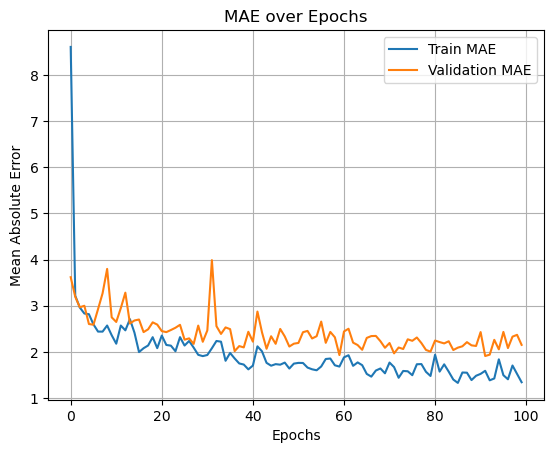

In [38]:
# Step 11: Plot MAE history
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.title('MAE over Epochs')
plt.legend()
plt.grid(True)
plt.show()

In [40]:
# Step 12: Predictions
predictions = model.predict(X_test).flatten()


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


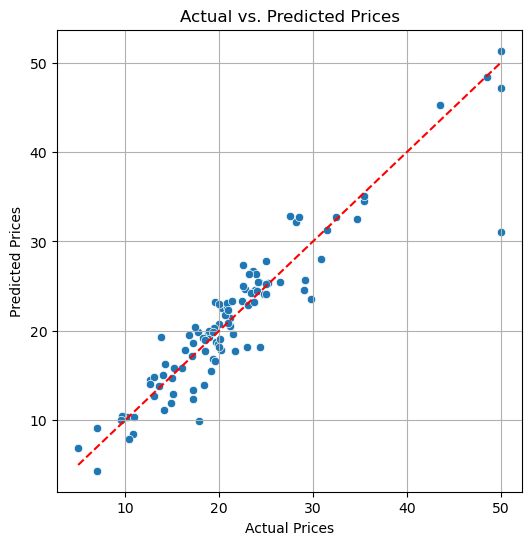

In [42]:
# Scatter plot of true vs predicted values
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices')
plt.grid(True)
plt.show()

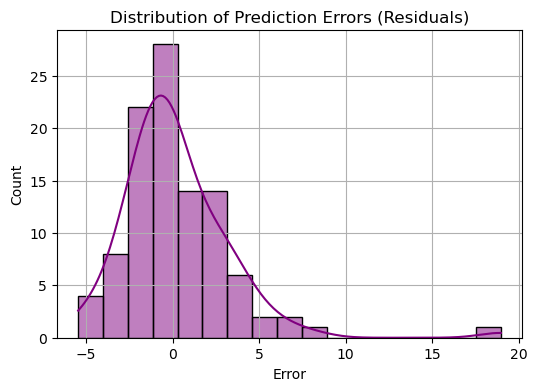

In [44]:
# Residual plot
residuals = y_test - predictions
plt.figure(figsize=(6, 4))
sns.histplot(residuals, kde=True, color='purple')
plt.title('Distribution of Prediction Errors (Residuals)')
plt.xlabel('Error')
plt.grid(True)
plt.show()

In [46]:
# Show some sample predictions
print("\nSample predictions:")
for i in range(5):
    print(f"Predicted: {predictions[i]:.2f}, Actual: {y_test[i]}")



Sample predictions:
Predicted: 26.72, Actual: 23.6
Predicted: 32.73, Actual: 32.4
Predicted: 13.84, Actual: 13.6
Predicted: 24.71, Actual: 22.8
Predicted: 15.88, Actual: 16.1
